# Minutes Dataset

Importing Librraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Loading the data

In [58]:
df = pd.read_csv('/content/minute_stats.csv')

Basic Analysis

In [59]:
df.head(3)

,Id,ActivityDay,ActivityMinute,METs,Calories,Intensity,Sleep,Steps
0,1503960366,01-05-2016,00:00:00,10,0.7865,0,0,0
1,1503960366,01-05-2016,00:01:00,12,0.9438,0,0,0
2,1503960366,01-05-2016,00:02:00,38,2.9887,1,0,50


In [60]:
df.dtypes

Id                  int64
ActivityDay        object
ActivityMinute     object
METs                int64
Calories          float64
Intensity           int64
Sleep               int64
Steps               int64
dtype: object

In [61]:
df.describe()

,Id,METs,Calories,Intensity,Sleep,Steps
count,1.326123e+06,1.326123e+06,1.326123e+06,1.326123e+06,1.326123e+06,1.326123e+06
mean,4.847838e+09,1.468814e+01,1.623045e+00,2.005123e-01,1.044209e-01,5.334013e+00
std,2.421819e+09,1.205330e+01,1.410166e+00,5.189327e-01,3.387419e-01,1.812491e+01
min,1.503960e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.320127e+09,1.000000e+01,9.357000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.445115e+09,1.000000e+01,1.217600e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,6.962181e+09,1.100000e+01,1.432700e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,8.877689e+09,1.570000e+02,1.974995e+01,3.000000e+00,3.000000e+00,2.200000e+02


In [62]:
df.isna().sum()

Id                0
ActivityDay       0
ActivityMinute    0
METs              0
Calories          0
Intensity         0
Sleep             0
Steps             0
dtype: int64

In [63]:
df.columns

Index(['Id', 'ActivityDay', 'ActivityMinute', 'METs', 'Calories', 'Intensity',
       'Sleep', 'Steps'],
      dtype='object')

Naming The Values

In [64]:
df2 = pd.read_csv('/content/Indian-Female-Names.csv')

In [65]:
import pandas as pd
import random

names = df2['name'].unique()
assert len(names) >= 33, "You need at least 33 unique names in 'df2'."
selected_names = names[:33]
mapping_dict = dict(zip(df['Id'].unique(), selected_names))
df['Name'] = df['Id'].map(mapping_dict)
print(df.head())


           Id ActivityDay ActivityMinute  METs  Calories  Intensity  Sleep  \
0  1503960366  01-05-2016       00:00:00    10    0.7865          0      0   
1  1503960366  01-05-2016       00:01:00    12    0.9438          0      0   
2  1503960366  01-05-2016       00:02:00    38    2.9887          1      0   
3  1503960366  01-05-2016       00:03:00    44    3.4606          1      0   
4  1503960366  01-05-2016       00:04:00    30    2.3595          1      0   

   Steps     Name  
0      0  shivani  
1      0  shivani  
2     50  shivani  
3     67  shivani  
4     25  shivani  


In [66]:
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])


<ipython-input-66-e86044d8827d>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



Rearranging Data

In [67]:
# Reorder the columns and add the 'Name' column after 'Id'
column_order = ['Id', 'Name', 'ActivityDay', 'ActivityMinute', 'METs', 'Calories', 'Intensity', 'Sleep', 'Steps']
df = df.reindex(columns=column_order)


In [68]:
df.head()

,Id,Name,ActivityDay,ActivityMinute,METs,Calories,Intensity,Sleep,Steps
0,1503960366,shivani,2016-01-05,00:00:00,10,0.7865,0,0,0
1,1503960366,shivani,2016-01-05,00:01:00,12,0.9438,0,0,0
2,1503960366,shivani,2016-01-05,00:02:00,38,2.9887,1,0,50
3,1503960366,shivani,2016-01-05,00:03:00,44,3.4606,1,0,67
4,1503960366,shivani,2016-01-05,00:04:00,30,2.3595,1,0,25


In [69]:
average_sleep_duration = df['Sleep'].mean()
print("Average Sleep Duration:", average_sleep_duration, "minutes")

Average Sleep Duration: 0.10442093229662709 minutes


<ipython-input-70-98ee7dd9d8c7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



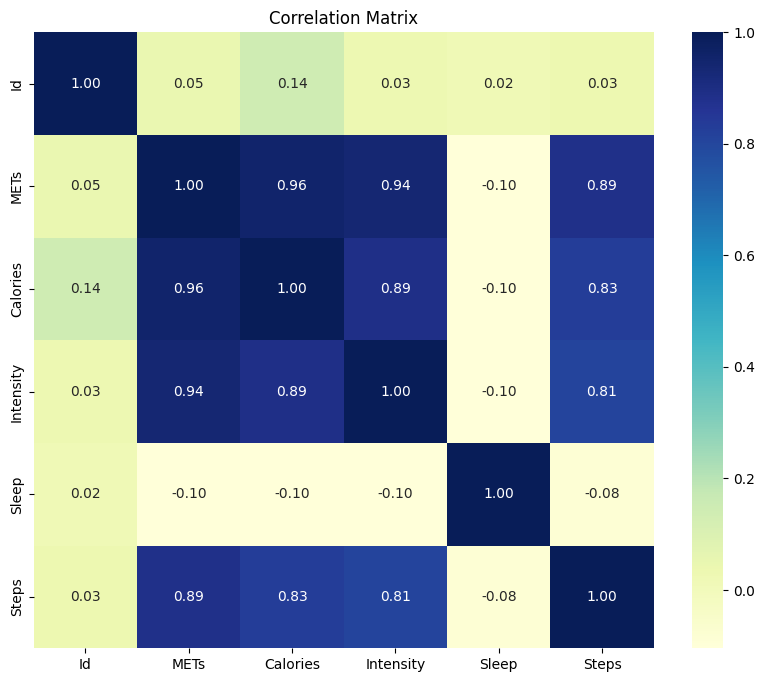

In [70]:
correlation_matrix = df.corr()

# Change the colors by specifying a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')  # Example colormap: Yellow-Green-Blue
plt.title('Correlation Matrix')
plt.show()

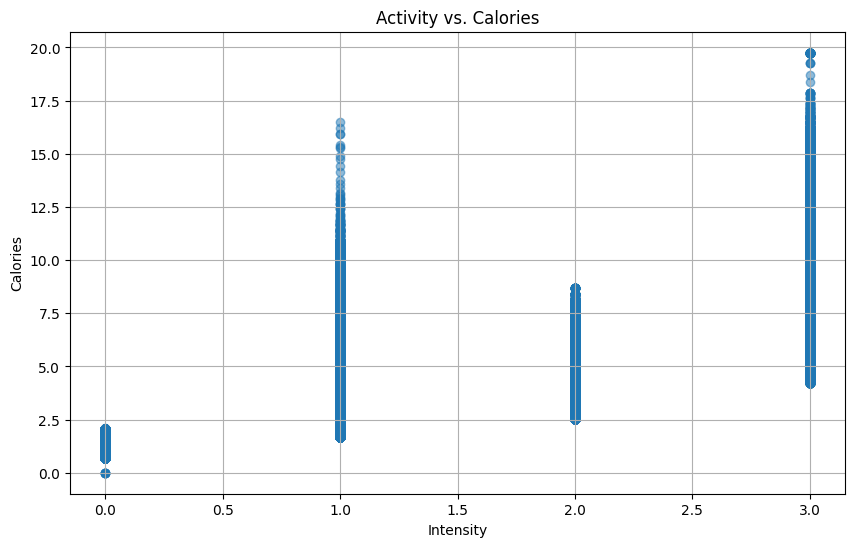

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Intensity'], df['Calories'], alpha=0.5)
plt.title('Activity vs. Calories')
plt.xlabel('Intensity')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

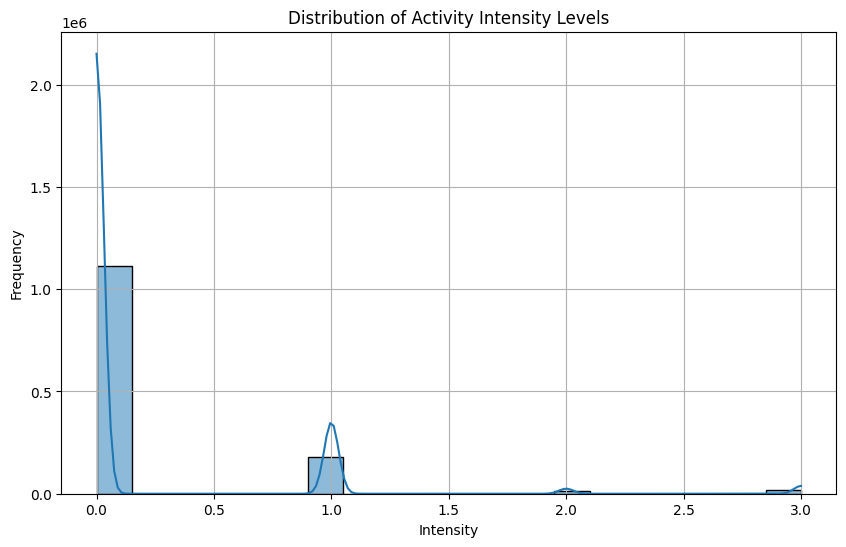

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Intensity'], bins=20, kde=True)
plt.title('Distribution of Activity Intensity Levels')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [73]:
fig = px.line(df, x=df.index, y=['Calories', 'METs', 'Steps'],
              title='Time Series Analysis', labels={'value': 'Value', 'index': 'Date'},
              color_discrete_map={'Calories': 'blue', 'METs': 'green', 'Steps': 'red'})

# Update layout
fig.update_layout(xaxis_title='Date', yaxis_title='Value', legend_title='Variable')

# Show plot
fig.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform time series decomposition for 'Calories'
decomposition = seasonal_decompose(df['Calories'], model='additive', period=7)  # Assuming weekly seasonality
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Calories'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='orange')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Intensity'], color='orange', shade=True)
plt.title('Activity Intensity Distribution')
plt.xlabel('Intensity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Visualization

In [ ]:
top10_minute = df.groupby(['Name', 'ActivityMinute'])['METs'].max().nlargest(10).reset_index()
print("Top 10 'Name' with most 'METs' for a single minute:")
print(top10_minute)
fig_top = px.bar(top10_minute, x='Name', y='METs', color='Name', title="Top 10 'Name' with most 'METs' for a single minute")
fig_top.show()

In [ ]:
# Remove rows with 0 'METs' for finding the lowest values
non_zero_df = df[df['METs'] != 0]

# Find bottom 10 'Name' with least 'METs' for a single minute
bottom10_minute = non_zero_df.groupby('Name').min().sort_values('METs').head(10).reset_index()

# Display the results
print("Bottom 10 'Name' with least 'METs' for a single minute:")
print(bottom10_minute[['Name', 'ActivityDay', 'ActivityMinute', 'METs']])

# Create bar chart for bottom 10
fig = px.bar(bottom10_minute, x='Name', y='METs', color='Name', title="Bottom 10 'Name' with least 'METs' for a single minute")
fig.show()


In [ ]:
import plotly.express as px

# Filter rows where 'sleep' is not 0
sleep_data = df[df['Sleep'] != 0]

# Create a heatmap for mets, calories, intensity, sleep, and steps
heatmap_data = df[['METs', 'Calories', 'Intensity', 'Sleep', 'Steps']]

# Create the correlation matrix
correlation_matrix = heatmap_data.corr()

# Define a custom colorscale with red for negative correlations and blue for positive correlations
custom_colorscale = [[0, 'red'], [0.5, 'lightgray'], [1, 'blue']]

# Plot the correlation heatmap with the custom colorscale
fig = px.imshow(correlation_matrix,
                labels=dict(color='Correlation'),
                title='Correlation Heatmap for METs, Calories, Intensity, Sleep, and Steps',
                color_continuous_scale=custom_colorscale,
                x=['METs', 'Calories', 'Intensity', 'Sleep', 'Steps'],
                y=['METs', 'Calories', 'Intensity', 'Sleep', 'Steps'])

# Show the plot
fig.show()


In [ ]:
fig_mets_calories = px.scatter(df, x='METs', y='Calories', title='Scatter Plot: METs vs. Calories',
                                color_discrete_sequence=['orange'])
fig_mets_calories.update_layout(
    xaxis_title='METs',               # Set x-axis title
    yaxis_title='Calories',           # Set y-axis title
    font=dict(family='Arial', size=12),# Set font style and size
    plot_bgcolor='white',             # Set plot background color
    paper_bgcolor='white',            # Set paper background color
    title_font=dict(size=18),         # Set title font size
    legend_title_font=dict(size=14),  # Set legend title font size
    legend_font=dict(size=12),        # Set legend font size
    margin=dict(l=50, r=50, t=80, b=50)  # Set margins
)

# Show the plot
fig_mets_calories.show()


In [ ]:
import plotly.express as px

# Create a scatter plot for METs vs. Intensity with discrete green colors
fig_mets_intensity = px.scatter(df, x='METs', y='Intensity', title='Scatter Plot: METs vs. Intensity',
                                color_discrete_sequence=['purple'])

# Update layout for better appearance
fig_mets_intensity.update_layout(
    xaxis_title='METs',               # Set x-axis title
    yaxis_title='Intensity',          # Set y-axis title
    font=dict(family='Arial', size=12),# Set font style and size
    plot_bgcolor='white',             # Set plot background color
    paper_bgcolor='white',            # Set paper background color
    title_font=dict(size=18),         # Set title font size
    legend_title_font=dict(size=14),  # Set legend title font size
    legend_font=dict(size=12),        # Set legend font size
    margin=dict(l=50, r=50, t=80, b=50)  # Set margins
)

# Show the plot
fig_mets_intensity.show()


In [ ]:
import plotly.express as px

# Select relevant columns for pair plot
pair_plot_data = df[['METs', 'Calories', 'Intensity', 'Sleep', 'Steps']]

# Create pair plot
fig_pair = px.scatter_matrix(pair_plot_data, title='Pair Plot: METs, Calories, Intensity, Sleep, and Steps')

# Update layout for better appearance
fig_pair.update_layout(
    font=dict(family='Arial', size=12),  # Set font style and size
    plot_bgcolor='white',                # Set plot background color
    paper_bgcolor='white',               # Set paper background color
    title_font=dict(size=18),            # Set title font size
)

# Show the plot
fig_pair.show()
